NBA Data Project. 
Goal: How has the league changed in the last 50 years?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.express as px

plt.style.use('fivethirtyeight')
    
pd.options.display.max_rows = 500

In [10]:
playerstats = pd.read_csv('NBA Player Stats(1950 - 2022).csv',index_col = 0)
payroll = pd.read_csv('NBA Payroll(1990-2023).csv',index_col = 0)
boxscore = pd.read_csv('NBA Player Box Score Stats(1950 - 2022).csv',index_col = 0)
salaries = pd.read_csv('NBA Salaries(1990-2022).csv',index_col = 0)

In [11]:
boxscore.describe()

,Season,Game_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
count,1.309778e+06,1.309778e+06,1.309778e+06,1.309778e+06,1.225111e+06,965197.000000,1.007039e+06,997931.000000,883922.000000,1.309778e+06,...,1.022585e+06,1.220688e+06,1.208042e+06,1.040813e+06,1.054535e+06,1.003286e+06,1.271017e+06,1.309778e+06,656278.000000,1.309778e+06
mean,1.993932e+03,2.498538e+07,2.154403e+01,3.893749e+00,8.529989e+00,0.423062,5.493700e-01,1.569539,0.169804,2.008469e+00,...,2.968081e+00,4.411857e+00,2.310866e+00,7.905080e-01,4.927964e-01,1.452260e+00,2.250982e+00,1.021835e+01,0.000482,2.136492e-01
std,1.934654e+01,3.586074e+06,1.317056e+01,3.263047e+00,6.097854e+00,0.249384,1.069526e+00,2.303220,0.282217,2.509512e+00,...,2.735611e+00,3.949120e+00,2.626595e+00,1.048980e+00,9.381666e-01,1.475775e+00,1.592940e+00,8.338477e+00,10.564587,4.155576e-01
min,1.946000e+03,2.000000e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-57.000000,0.000000e+00
25%,1.980000e+03,2.130051e+07,1.100000e+01,1.000000e+00,4.000000e+00,0.286000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,-7.000000,0.000000e+00
50%,1.996000e+03,2.590025e+07,2.200000e+01,3.000000e+00,8.000000e+00,0.444000,0.000000e+00,0.000000,0.000000,1.000000e+00,...,2.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,8.000000e+00,0.000000,0.000000e+00
75%,2.010000e+03,2.840078e+07,3.200000e+01,6.000000e+00,1.200000e+01,0.571000,1.000000e+00,2.000000,0.333000,3.000000e+00,...,4.000000e+00,6.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.500000e+01,6.000000,0.000000e+00
max,2.023000e+03,2.990119e+07,6.900000e+01,3.600000e+01,6.300000e+01,1.000000,1.400000e+01,24.000000,1.000000,2.800000e+01,...,2.900000e+01,5.500000e+01,3.000000e+01,1.100000e+01,1.700000e+01,1.400000e+01,2.300000e+01,1.000000e+02,57.000000,2.000000e+00


The three point line was introduced in 1979, for this project we will only consider seasons after 1979 and players who have scored more than 0 points. The original data set contains all players on NBA rosters even if they did not play.

In [12]:
box_score = boxscore[(boxscore['Season'] >= 1979)]


In [14]:
box_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017306 entries, 579538 to 1283972
Data columns (total 28 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Season           1017306 non-null  int64  
 1   Game_ID          1017306 non-null  int64  
 2   PLAYER_NAME      1017306 non-null  object 
 3   Team             1017306 non-null  object 
 4   GAME_DATE        1017306 non-null  object 
 5   MATCHUP          1017306 non-null  object 
 6   WL               1017179 non-null  object 
 7   MIN              1017306 non-null  int64  
 8   FGM              1017306 non-null  int64  
 9   FGA              1016459 non-null  float64
 10  FG_PCT           953686 non-null   float64
 11  FG3M             1007039 non-null  float64
 12  FG3A             997931 non-null   float64
 13  FG3_PCT          883922 non-null   float64
 14  FTM              1017306 non-null  int64  
 15  FTA              1017296 non-null  float64
 16  FT_PCT       

In [17]:
box_score.head(100)


,Season,Game_ID,PLAYER_NAME,Team,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
579538,1979,27800401,Aaron James,NOJ,"JAN 02, 1979",NOJ vs. LAL,W,20,1,5.0,...,2.0,4.0,2.0,1.0,0.0,2.0,4.0,4,NaN,0
579536,1979,27800415,Aaron James,NOJ,"JAN 04, 1979",NOJ vs. NJN,L,7,0,3.0,...,NaN,3.0,0.0,NaN,NaN,NaN,1.0,0,NaN,0
579537,1979,27800412,Aaron James,NOJ,"JAN 03, 1979",NOJ @ SAN,L,26,1,4.0,...,NaN,2.0,4.0,0.0,0.0,NaN,3.0,2,NaN,0
579511,1979,27800753,Aaron James,NOJ,"MAR 14, 1979",NOJ @ MIL,L,35,10,18.0,...,NaN,4.0,3.0,2.0,0.0,NaN,3.0,20,NaN,0
579517,1979,27803004,Aaron James,NOJ,"FEB 24, 1979",NOJ @ CLE,W,13,3,6.0,...,1.0,2.0,2.0,0.0,0.0,0.0,5.0,6,NaN,0
579516,1979,27800688,Aaron James,NOJ,"FEB 28, 1979",NOJ @ BOS,L,17,4,7.0,...,2.0,3.0,2.0,0.0,0.0,1.0,5.0,9,NaN,0
579515,1979,27800703,Aaron James,NOJ,"MAR 03, 1979",NOJ @ DET,L,23,3,9.0,...,NaN,5.0,2.0,NaN,NaN,NaN,1.0,6,NaN,0
579514,1979,27800724,Aaron James,NOJ,"MAR 07, 1979",NOJ vs. POR,L,11,3,7.0,...,2.0,4.0,1.0,0.0,0.0,1.0,2.0,9,NaN,0
579512,1979,27800750,Aaron James,NOJ,"MAR 13, 1979",NOJ @ NYK,L,19,1,6.0,...,NaN,4.0,0.0,NaN,NaN,NaN,4.0,3,NaN,0
579510,1979,27800761,Aaron James,NOJ,"MAR 15, 1979",NOJ vs. SAN,W,18,7,13.0,...,NaN,2.0,1.0,0.0,0.0,NaN,3.0,16,NaN,0


In [18]:
player_stats = playerstats[(playerstats['Season'] >= 1979) & (playerstats['PTS'] > 0) & (playerstats['MP']) > 0]

In [19]:
duplicates = player_stats[player_stats.duplicated()]
duplicates

,Unnamed: 0,Season,Player,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [20]:
duplicates = box_score[box_score.duplicated()]
duplicates

,Season,Game_ID,PLAYER_NAME,Team,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE


In [21]:
duplicates = salaries[salaries.duplicated()]
duplicates

,playerName,seasonStartYear,salary,inflationAdjSalary


In [22]:
duplicates = payroll[payroll.duplicated()]
duplicates

,team,seasonStartYear,payroll,inflationAdjPayroll


'seasonStartYear' showed 2022 values as 2021. Found the duplicates and updated them.

In [45]:
payroll['seasonStartYear'][payroll.duplicated()] = 2022
payroll

<ipython-input-45-44294b4357a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payroll['seasonStartYear'][payroll.duplicated()] = 2022


,team,seasonStartYear,payroll,inflationAdjPayroll
0,Cleveland,1990,"$14,403,000","$32,854,246"
1,New York,1990,"$13,290,000","$30,315,416"
2,Detroit,1990,"$12,910,000","$29,448,608"
3,LA Lakers,1990,"$12,120,000","$27,646,565"
4,Atlanta,1990,"$11,761,000","$26,827,658"
...,...,...,...,...
25,Portland,2022,"$124,788,473","$136,093,994"
26,Charlotte,2022,"$122,139,566","$133,205,107"
27,New York,2022,"$120,644,081","$131,574,134"
28,Memphis,2022,"$117,284,457","$127,910,133"


In [24]:
nbaplayoffs = pd.DataFrame({
    'season':[1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,
              2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],
    'startdate':["1979-04-10","1980-04-02","1981-03-31","1982-04-20","1983-04-19","1984-04-17","1985-04-17","1986-04-17","1987-04-23","1988-04-28","1989-04-27"
                 ,"1990-04-26","1991-04-25","1992-04-23","1993-04-29","1994-04-28","1995-04-27","1996-04-25","1997-04-24","1998-04-23","1999-05-08"
                 ,"2000-04-22","2001-04-21","2002-04-20","2003-04-19","2004-04-17","2005-04-23","2006-04-22","2007-04-21","2008-04-19","2009-04-18"
                 ,"2010-04-17","2011-04-16","2012-04-28","2013-04-20","2014-04-19","2015-04-18","2016-04-16","2017-04-15","2018-04-14","2019-04-13"
                 ,"2020-08-17","2021-05-22","2022-04-16"],
    'winners':["Oklahoma City Thunder","Los Angeles Lakers","Boston Celtics","Los Angeles Lakers","Philadelphia 76ers","Boston Celtics","Los Angeles Lakers","Boston Celtics","Los Angeles Lakers","Los Angeles Lakers",
               "Detroit Pistons","Detroit Pistons","Chicago Bulls","Chicago Bulls","Chicago Bulls","Houston Rockets","Houston Rockets","Chicago Bulls","Chicago Bulls","Chicago Bulls","San Antonio Spurs",
               "Los Angeles Lakers","Los Angeles Lakers","Los Angeles Lakers","San Antonio Spurs","Detroit Pistons","San Antonio Spurs","Miami Heat","San Antonio Spurs","Boston Celtics","Los Angeles Lakers",
               "Los Angeles Lakers","Dallas Mavericks","Miami Heat","Miami Heat","San Antonio Spurs","Golden State Warriors","Cleveland Cavaliers","Golden State Warriors","Golden State Warriors","Toronto Raptors",
               "Los Angeles Lakers","Milwaukee Bucks","Golden State Warriors"]
})

In [25]:
box_score = box_score.fillna(0)
player_stats = player_stats.fillna(0)

player_stats.drop(columns=['Unnamed: 0'])

,Season,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5633,1979,Kareem Abdul-Jabbar,C,31.0,LAL,80.0,0.0,3157.0,777.0,1347.0,...,0.736,207.0,818.0,1025.0,431.0,76.0,316.0,282.0,230.0,1903.0
5634,1979,Tom Abernethy,PF,24.0,GSW,70.0,0.0,1219.0,176.0,342.0,...,0.745,74.0,142.0,216.0,79.0,39.0,13.0,32.0,133.0,422.0
5635,1979,Alvan Adams,C,24.0,PHO,77.0,0.0,2364.0,569.0,1073.0,...,0.799,220.0,485.0,705.0,360.0,110.0,63.0,279.0,246.0,1369.0
5636,1979,Lucius Allen,PG,31.0,KCK,31.0,0.0,413.0,69.0,174.0,...,0.576,14.0,32.0,46.0,44.0,21.0,6.0,30.0,52.0,157.0
5637,1979,Kim Anderson,SF,23.0,POR,21.0,0.0,224.0,24.0,77.0,...,0.536,17.0,28.0,45.0,15.0,4.0,5.0,22.0,42.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29344,2022,Thaddeus Young,PF,33.0,TOR,26.0,0.0,475.0,67.0,144.0,...,0.481,40.0,75.0,115.0,45.0,31.0,11.0,22.0,43.0,164.0
29345,2022,Trae Young,PG,23.0,ATL,76.0,76.0,2652.0,711.0,1544.0,...,0.904,50.0,234.0,284.0,737.0,72.0,7.0,303.0,128.0,2155.0
29346,2022,Omer Yurtseven,C,23.0,MIA,56.0,12.0,706.0,130.0,247.0,...,0.623,85.0,209.0,294.0,49.0,17.0,20.0,41.0,84.0,299.0
29347,2022,Cody Zeller,C,29.0,POR,27.0,0.0,355.0,51.0,90.0,...,0.776,50.0,75.0,125.0,22.0,8.0,6.0,19.0,56.0,140.0


In [28]:
box_score_3pt = box_score.groupby(['Season'])['FG3M'].sum()
box_score_3pt = box_score_3pt.drop(2023, axis=0)

Text(0, 0.5, 'Points')

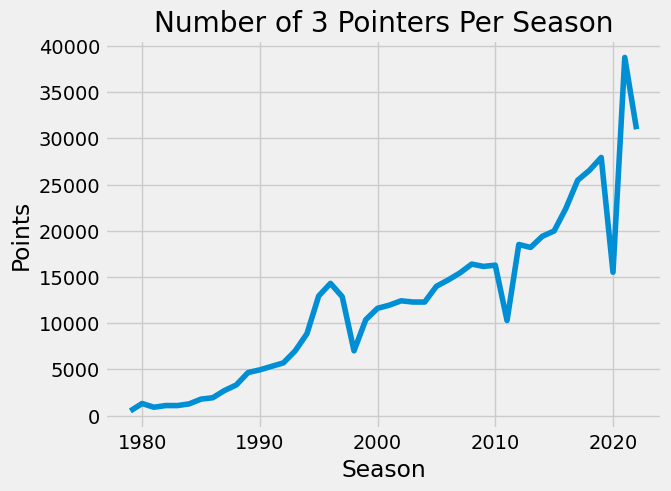

In [38]:

box_score_3pt.plot()
plt.title("Number of 3 Pointers Per Season")
plt.xlabel("Season")
plt.ylabel("Points")

In [79]:
totalpts = box_score.groupby('Season')['FGM','FG3M'].sum()
totalpts = totalpts.assign(FG_NOT3 = totalpts['FGM']-totalpts['FG3M'])
totalpts = totalpts.assign(PCT_3 = (totalpts['FG3M']/totalpts['FGM'])*100)
totalpts['PCT_3'] = round(totalpts['PCT_3'],2)
totalpts = totalpts.drop(2023, axis=0)

<ipython-input-79-d393cc1f9c7e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  totalpts = box_score.groupby('Season')['FGM','FG3M'].sum()


In [82]:
totalpts["PCT_3"]

Season
1979     0.61
1980     1.63
1981     1.27
1982     1.29
1983     1.31
1984     1.52
1985     2.15
1986     2.47
1987     3.49
1988     3.98
1989     5.23
1990     5.33
1991     5.82
1992     6.45
1993     7.85
1994    10.27
1995    15.11
1996    16.41
1997    14.93
1998    12.69
1999    12.88
2000    13.30
2001    14.02
2002    14.36
2003    14.48
2004    14.95
2005    15.72
2006    16.22
2007    17.13
2008    17.67
2009    17.51
2010    17.52
2011    17.10
2012    18.20
2013    19.63
2014    20.63
2015    21.51
2016    23.26
2017    25.59
2018    26.65
2019    28.76
2020    30.18
2021    30.87
2022    30.01
Name: PCT_3, dtype: float64

In [74]:

tp = totalpts.drop(columns=['PCT_3'], axis=1)

Text(0.5, 0, 'Season')

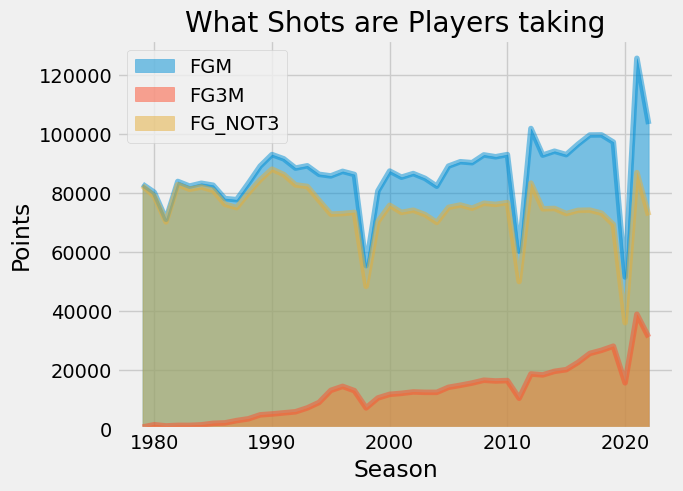

In [77]:
tp.plot.area(stacked=False)
plt.title("What Shots are Players taking")
plt.ylabel("Points")
plt.xlabel("Season")

In [69]:
totalpts

,FGM,FG3M,FG_NOT3,PCT_3
Season,,,,
1979,82832,502.0,82330.0,0.61
1980,80102,1304.0,78798.0,1.63
1981,70959,898.0,70061.0,1.27
1982,83776,1084.0,82692.0,1.29
1983,82200,1080.0,81120.0,1.31
1984,83156,1264.0,81892.0,1.52
1985,82495,1777.0,80718.0,2.15
1986,77977,1927.0,76050.0,2.47
1987,77600,2712.0,74888.0,3.49


In [ ]:
box_score[(boxscore['Season'] >= 2000)].groupby(['Team','Season'])['PTS'].mean()



<ipython-input-29-fff6d1a896ca>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  box_score[(boxscore['Season'] >= 2000)].groupby(['Team','Season'])['PTS'].mean()


Team  Season
ATL   2000       8.698246
      2001       9.277778
      2002       9.370280
      2003       9.276471
      2004       9.377953
                  ...    
WAS   2019      11.458869
      2020      10.523810
      2021      10.236025
      2022      10.534989
      2023      10.760532
Name: PTS, Length: 730, dtype: float64

In [ ]:
payroll

,team,seasonStartYear,payroll,inflationAdjPayroll
0,Cleveland,1990,"$14,403,000","$32,854,246"
1,New York,1990,"$13,290,000","$30,315,416"
2,Detroit,1990,"$12,910,000","$29,448,608"
3,LA Lakers,1990,"$12,120,000","$27,646,565"
4,Atlanta,1990,"$11,761,000","$26,827,658"
...,...,...,...,...
25,Portland,2022,"$124,788,473","$136,093,994"
26,Charlotte,2022,"$122,139,566","$133,205,107"
27,New York,2022,"$120,644,081","$131,574,134"
28,Memphis,2022,"$117,284,457","$127,910,133"


In [ ]:
player_stats['Player']

5633     Kareem Abdul-Jabbar
5634           Tom Abernethy
5635             Alvan Adams
5636            Lucius Allen
5637            Kim Anderson
                ...         
29344         Thaddeus Young
29345             Trae Young
29346         Omer Yurtseven
29347            Cody Zeller
29348            Ivica Zubac
Name: Player, Length: 22484, dtype: object

In [ ]:
#Download data for SQL Server and Tableau
from google.colab import files
salaries.to_csv('salaries.csv', encoding = 'utf-8-sig') 
files.download('salaries.csv')
box_score.to_csv('box_score.csv', encoding = 'utf-8-sig') 
files.download('box_score.csv')
payroll.to_csv('payroll.csv', encoding = 'utf-8-sig') 
files.download('payroll.csv')
player_stats.to_csv('playerstats.csv', encoding = 'utf-8-sig') 
files.download('playerstats.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NBA Historical Analysis. With the introduction of the three point line in the 1979 season how have offenses changed since. 2 point %, 3 point %. 

In [ ]:

rebounds = player_stats.groupby('Player')['TRB','DRB','ORB','STL','BLK'].sum()
rebounds = rebounds.sort_values(by=['TRB'], ascending=False)


<ipython-input-32-a5f29ba8850a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rebounds = player_stats.groupby('Player')['TRB','DRB','ORB','STL','BLK'].sum()


In [ ]:
rebounds.head(10)

,TRB,DRB,ORB,STL,BLK
Player,,,,,
Tim Duncan,15091.0,11232.0,3859.0,1025.0,3020.0
Kevin Garnett,14973.0,11716.0,3257.0,1905.0,2054.0
Karl Malone,14968.0,11406.0,3562.0,2085.0,1145.0
Dwight Howard,14627.0,10476.0,4151.0,1081.0,2228.0
Moses Malone,14254.0,8340.0,5914.0,974.0,1476.0
Kevin Willis,13803.0,9059.0,4744.0,1107.0,879.0
Hakeem Olajuwon,13748.0,9714.0,4034.0,2162.0,3830.0
Shaquille O'Neal,13653.0,9278.0,4375.0,771.0,2820.0
Robert Parish,13492.0,9306.0,4186.0,1085.0,2144.0


In [ ]:
player_stats.query('Player=="Tim Duncan"')['TRB'].sum()

15091.0

In [43]:
stats_per_season = player_stats.groupby('Season')['PTS','TRB','AST'].sum()

<ipython-input-43-2fd446f0b346>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stats_per_season = player_stats.groupby('Season')['PTS','TRB','AST'].sum()


Text(0, 0.5, 'Amount')

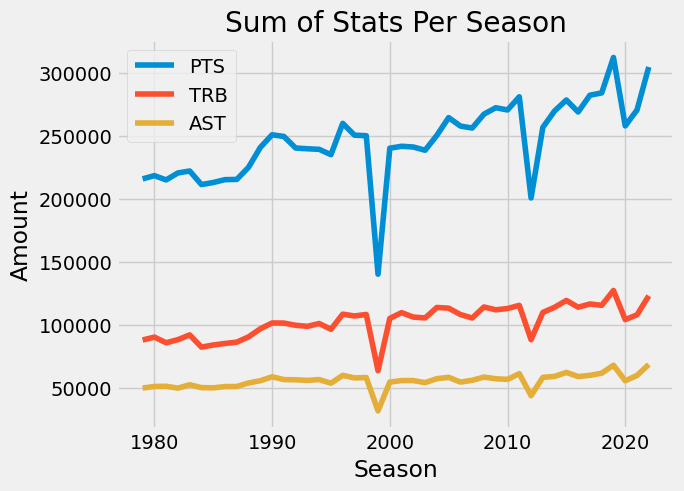

In [44]:
stats_per_season.plot()
plt.title('Sum of Stats Per Season')
plt.ylabel('Amount')

A look at the total points, rebounds, and assists made from the 1979 season to the 2022 season. We see an upward trajectory for points and rebounds. Assists have increased over the time period but not as much the others. We notice dips for the 1999, 2012, and 2020 seasons. 1999 and 2012 NBA experienced lockout due to player salary disputes. 2020 season was shortend due to the COVID-19 pandemic. 

In [ ]:
px.line(stats_per_season)

In [ ]:
salaries[salaries.columns[2:]] = salaries[salaries.columns[2:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)


In [87]:
payroll_total = payroll.groupby('seasonStartYear')['inflationAdjPayroll'].sum()

In [ ]:
payroll[payroll.columns[2:]] = payroll[payroll.columns[2:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
                                                      

In [89]:
season_salaries = salaries.groupby('seasonStartYear')['salary'].sum()

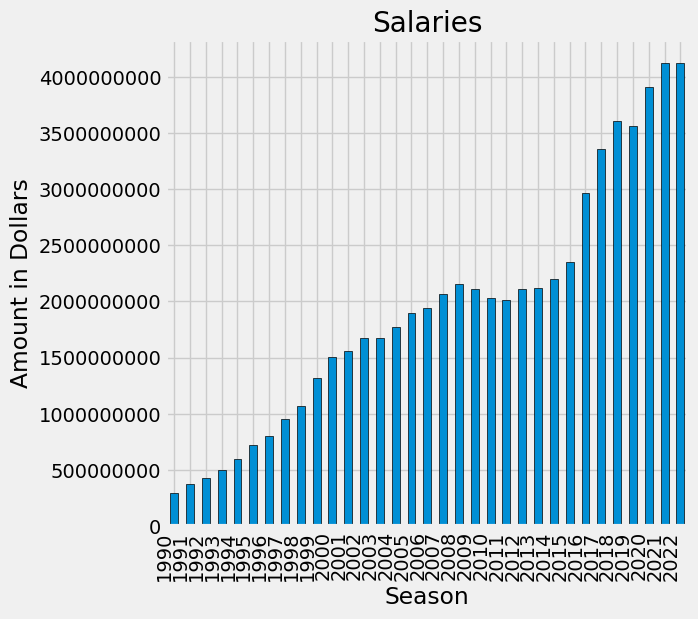

In [99]:
ax = season_salaries.T \
  .plot(kind='bar',figsize=(6,6), edgecolor = 'black',
        title ='Salaries',xlabel='Season',ylabel='Amount in Dollars')

ax.legend().remove()
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.xticks(
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)

plt.show()

In [ ]:
points = player_stats.groupby('Player')['PTS','TRB'].sum()
points = points.sort_values(by=['PTS'], ascending=False)
points = points.drop(columns = ['TRB'])
points = points[:10]

<ipython-input-105-382ff15aaffb>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
percentages = player_stats.groupby('Season')['FG%','2P%','3P%','FT%'].mean()


<ipython-input-112-aaa527857d19>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
px.line(percentages)

In [ ]:
player_stats.value_counts('Pos')

Pos
PF          4654
SG          4536
PG          4435
C           4410
SF          4189
SF-SG         40
SG-PG         33
SG-SF         33
C-PF          32
PG-SG         30
PF-C          30
PF-SF         29
SF-PF         26
SG-PF          4
PG-SF          1
SF-C           1
SG-PG-SF       1
dtype: int64

In [ ]:
stats = player_stats.groupby(['Pos','Season'])['PTS','TRB','AST'].sum()
C_stats = stats.query('Pos == "C"')
PF_stats = stats.query('Pos=="PF"')
SG_stats = stats.query('Pos=="SG"')
PG_stats = stats.query('Pos=="PG"')
SF_stats = stats.query('Pos=="SF"')

<ipython-input-128-38c6f8e073bd>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
C_stats = C_stats.droplevel(0,axis = 0)
PF_stats = PF_stats.droplevel(0,axis = 0)
SG_stats = SG_stats.droplevel(0,axis = 0)
PG_stats = PG_stats.droplevel(0,axis = 0)
SF_stats = SF_stats.droplevel(0,axis = 0)

In [ ]:
px.line(SF_stats,title = 'Small Forward Stats Over Time')

In [ ]:
px.line(PF_stats,title = 'Power Forward Stats Over Time')

In [ ]:
px.line(SG_stats,title = 'Shooting Gaurd Stats Over Time')

In [ ]:
px.line(C_Stats, title = 'Center Stats Over Time')

In [ ]:
px.line(PG_stats,title = 'Point Gaurd Stats Over Time')

In [ ]:
box_score

,Season,Game_ID,PLAYER_NAME,Team,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
579538,1979,27800401,Aaron James,NOJ,"JAN 02, 1979",NOJ vs. LAL,W,20,1,5.0,...,2.0,4.0,2.0,1.0,0.0,2.0,4.0,4,0.0,0
579536,1979,27800415,Aaron James,NOJ,"JAN 04, 1979",NOJ vs. NJN,L,7,0,3.0,...,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0
579537,1979,27800412,Aaron James,NOJ,"JAN 03, 1979",NOJ @ SAN,L,26,1,4.0,...,0.0,2.0,4.0,0.0,0.0,0.0,3.0,2,0.0,0
579511,1979,27800753,Aaron James,NOJ,"MAR 14, 1979",NOJ @ MIL,L,35,10,18.0,...,0.0,4.0,3.0,2.0,0.0,0.0,3.0,20,0.0,0
579517,1979,27803004,Aaron James,NOJ,"FEB 24, 1979",NOJ @ CLE,W,13,3,6.0,...,1.0,2.0,2.0,0.0,0.0,0.0,5.0,6,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282549,2023,22200663,Ziaire Williams,MEM,"JAN 16, 2023",MEM vs. PHX,W,17,1,3.0,...,2.0,3.0,0.0,0.0,0.0,0.0,3.0,3,14.0,1
1282548,2023,22200672,Ziaire Williams,MEM,"JAN 18, 2023",MEM vs. CLE,W,17,1,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,-8.0,1
1282547,2023,22200690,Ziaire Williams,MEM,"JAN 20, 2023",MEM @ LAL,L,18,1,6.0,...,2.0,3.0,2.0,0.0,0.0,0.0,5.0,2,-2.0,1
1282546,2023,22200703,Ziaire Williams,MEM,"JAN 22, 2023",MEM @ PHX,L,26,6,11.0,...,4.0,5.0,0.0,0.0,0.0,3.0,2.0,16,5.0,1


Taking a look at PLUS MINUS statistic. PLUS MINUS was introduced in the 2008 NBA season as a way of looking at NBA player efficency. The NBA players are given a score based on the average player while playing.

In [ ]:
#Looking at plus minus
box_score_new = box_score[(box_score['Season'] >= 2007)]
player_plus_minus = box_score_new.groupby('PLAYER_NAME')['PTS','AST','REB','PLUS_MINUS'].mean()


<ipython-input-151-f36cc185b193>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
player_plus_minus = player_plus_minus.sort_values(by=['PLUS_MINUS'], ascending=False)

Looking at players averaging more than 20 points for their careers. We see that there PLUS MINUS ratings range from a high of 6.43 to a low of -2.93

In [ ]:

filter = player_plus_minus["PTS"] >= 20.0
  
# filtering data
player_plus_minus.query('PTS >= 20.0')

  

,PTS,AST,REB,PLUS_MINUS
PLAYER_NAME,,,,
Stephen Curry,24.614773,6.507955,4.735227,6.428409
LeBron James,27.338542,7.521701,7.710938,5.902778
Joel Embiid,27.218830,3.440204,11.185751,5.862595
Jayson Tatum,22.474886,3.296804,7.000000,5.611872
Yao Ming,20.740506,1.949367,9.993671,5.000000
Nikola Jokic,20.248739,6.636975,10.526050,4.692437
Kevin Durant,27.272081,4.327919,7.057868,4.545178
Donovan Mitchell,24.590799,4.462470,4.169492,4.220339
James Harden,24.703704,7.018018,5.649650,3.985986
